# Gerando Embeddings e Visualizando

In [1]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [ ]:
# Carregar o dataset de avaliações da Sephora
sephora_data = pd.read_csv('../data/sephora_reviews.csv') 

# Inicializar o modelo SBERT
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

sephora_data['combined_text'] = sephora_data['Review']  

embeddings = model.encode(sephora_data['combined_text'].tolist(), convert_to_tensor=True)

torch.save(embeddings, 'sephora_embeddings.pt')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.12k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

embeddings_tensor = torch.load('sephora_embeddings.pt')  
embeddings_tensor = embeddings_tensor.float()  

# Autoencoder
class EmbeddingAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim1=256, hidden_dim2=128):
        super(EmbeddingAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, hidden_dim2),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim2, hidden_dim1),
            nn.ReLU(),
            nn.Linear(hidden_dim1, input_dim)
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded


input_dim = embeddings_tensor.shape[1] 
hidden_dim = 128 

# Inicializar o modelo, otimizador e função de perda
autoencoder = EmbeddingAutoencoder(input_dim, hidden_dim)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
criterion = nn.MSELoss()

# Loop de treinamento
epochs = 30
for epoch in range(epochs):
    optimizer.zero_grad()
    decoded, encoded = autoencoder(embeddings_tensor)
    loss = criterion(decoded, embeddings_tensor)  # Perda de reconstrução
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

fine_tuned_embeddings = encoded.detach().numpy()


<ipython-input-3-366bb0074e36>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  embeddings_tensor = torch.load('sephora_embeddings.pt')  # Carregar o arquivo de embeddings


Epoch 1/30, Loss: 0.03084244206547737
Epoch 2/30, Loss: 0.029733065515756607
Epoch 3/30, Loss: 0.028813336044549942
Epoch 4/30, Loss: 0.027919473126530647
Epoch 5/30, Loss: 0.026972586289048195
Epoch 6/30, Loss: 0.025933686643838882
Epoch 7/30, Loss: 0.024785591289401054
Epoch 8/30, Loss: 0.023552872240543365
Epoch 9/30, Loss: 0.022320374846458435
Epoch 10/30, Loss: 0.021243013441562653
Epoch 11/30, Loss: 0.020461050793528557
Epoch 12/30, Loss: 0.019830387085676193
Epoch 13/30, Loss: 0.019079633057117462
Epoch 14/30, Loss: 0.018269723281264305
Epoch 15/30, Loss: 0.017579831182956696
Epoch 16/30, Loss: 0.017075279727578163
Epoch 17/30, Loss: 0.0167074017226696
Epoch 18/30, Loss: 0.016403060406446457
Epoch 19/30, Loss: 0.016123894602060318
Epoch 20/30, Loss: 0.015872975811362267
Epoch 21/30, Loss: 0.01566505618393421
Epoch 22/30, Loss: 0.015493158251047134
Epoch 23/30, Loss: 0.015324446372687817
Epoch 24/30, Loss: 0.015132485888898373
Epoch 25/30, Loss: 0.01492409035563469
Epoch 26/30, L

In [ ]:
np.save('fine_tuned_embeddings.npy', fine_tuned_embeddings)

## Visualizando Embeddings

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


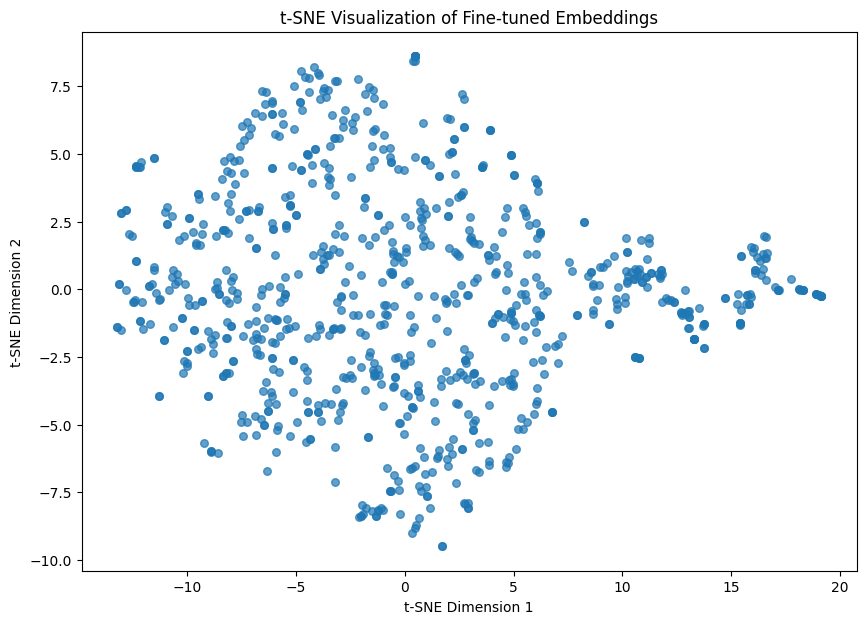

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
embeddings_2d = tsne.fit_transform(fine_tuned_embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=30, alpha=0.7)

plt.title("t-SNE Visualization of Fine-tuned Embeddings")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


In [6]:
from sklearn.cluster import KMeans

# Define the number of clusters
n_clusters = 10  # You can adjust this based on your data and visualization

# Initialize and fit K-Means on the 2D embeddings
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_2d)

# Add the cluster labels to your data for easy analysis
sephora_data['Cluster'] = cluster_labels


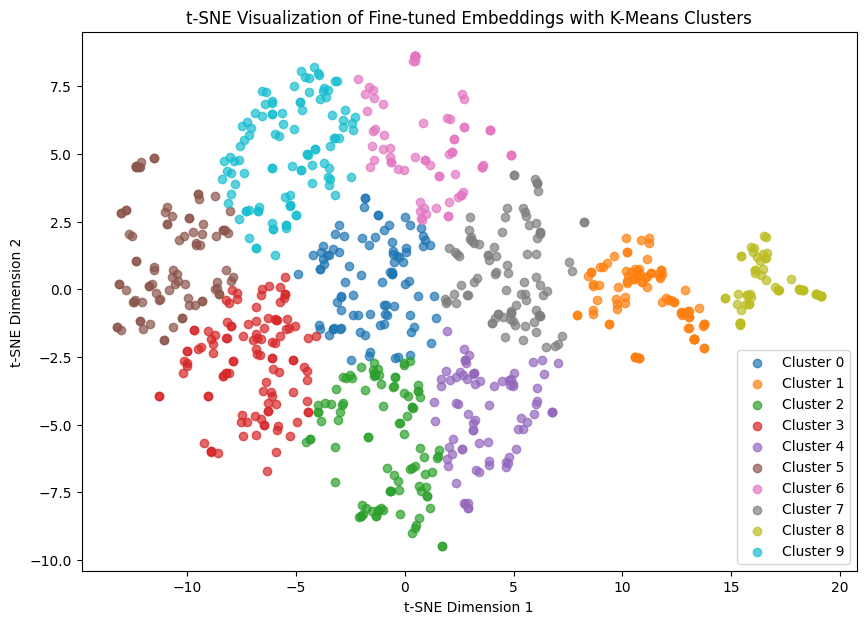

In [7]:
# Create a scatter plot with clusters
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    # Filter data points for the current cluster
    cluster_points = embeddings_2d[sephora_data['Cluster'] == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster}', alpha=0.7)

plt.legend(loc='best')
plt.title("t-SNE Visualization of Fine-tuned Embeddings with K-Means Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


## Comparando Embeddings Pre-Treinados e Finetunados

<ipython-input-9-79dcf7dd8ad3>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_embeddings = torch.load('sephora_embeddings.pt')  # Embeddings gerados com SBERT


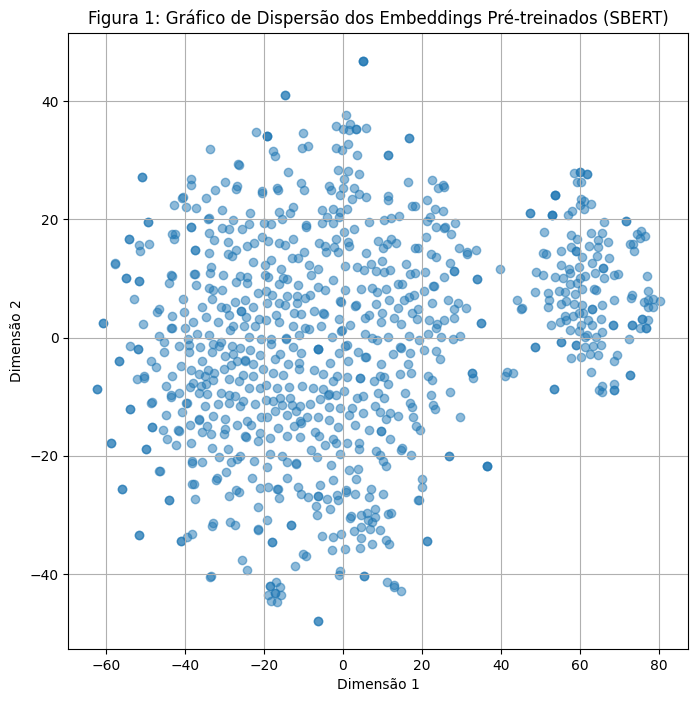

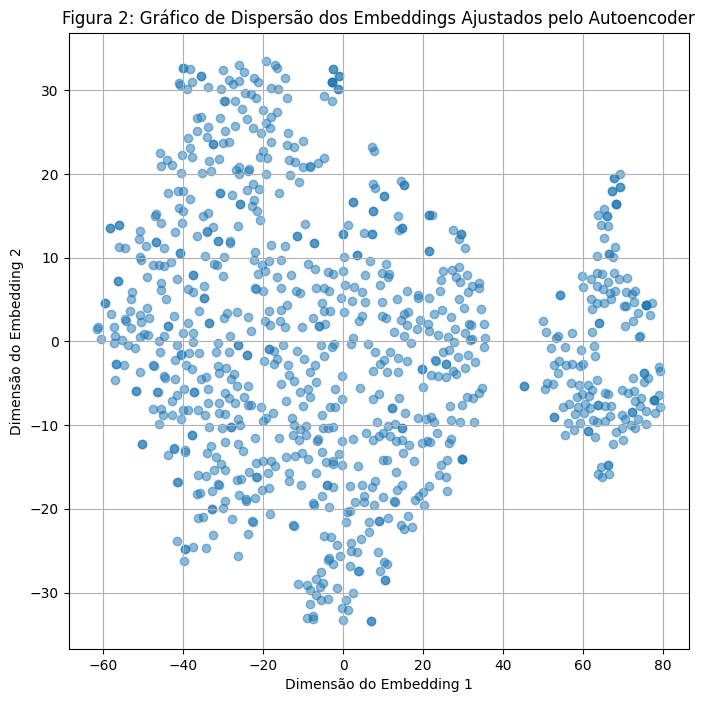

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import numpy as np
import torch

# Carregar embeddings pré-treinados e ajustados
pretrained_embeddings = torch.load('sephora_embeddings.pt')  # Embeddings gerados com SBERT
fine_tuned_embeddings = np.load('fine_tuned_embeddings.npy')  # Embeddings ajustados pelo autoencoder

# Converter embeddings pré-treinados para NumPy para usar no TSNE
pretrained_embeddings_np = pretrained_embeddings.cpu().numpy()

# Reduzir a dimensionalidade dos embeddings pré-treinados com TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30)
pretrained_embeddings_2d = tsne.fit_transform(pretrained_embeddings_np)

# Reduzir a dimensionalidade dos embeddings ajustados com TSNE
fine_tuned_embeddings_2d = tsne.fit_transform(fine_tuned_embeddings)

# Figura 1: Visualizar os embeddings pré-treinados
plt.figure(figsize=(8, 8))
plt.scatter(pretrained_embeddings_2d[:, 0], pretrained_embeddings_2d[:, 1], alpha=0.5)
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.title('Figura 1: Gráfico de Dispersão dos Embeddings Pré-treinados (SBERT)')
plt.grid(True)
plt.show()

# Figura 2: Visualizar os embeddings ajustados
plt.figure(figsize=(8, 8))
plt.scatter(fine_tuned_embeddings_2d[:, 0], fine_tuned_embeddings_2d[:, 1], alpha=0.5)
plt.xlabel('Dimensão do Embedding 1')
plt.ylabel('Dimensão do Embedding 2')
plt.title('Figura 2: Gráfico de Dispersão dos Embeddings Ajustados pelo Autoencoder')
plt.grid(True)
plt.show()


In [10]:
import plotly.express as px
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import torch
import pandas as pd

# Load pre-trained and fine-tuned embeddings
pretrained_embeddings = torch.load('sephora_embeddings.pt').cpu().numpy()
fine_tuned_embeddings = np.load('fine_tuned_embeddings.npy')

# Apply TSNE to both embeddings
tsne = TSNE(n_components=2, random_state=0, perplexity=40)
pretrained_tsne = tsne.fit_transform(pretrained_embeddings)
fine_tuned_tsne = tsne.fit_transform(fine_tuned_embeddings)

# Apply KMeans clustering for better insights into document organization
n_clusters = 5
kmeans_pretrained = KMeans(n_clusters=n_clusters, random_state=0).fit(pretrained_tsne)
kmeans_fine_tuned = KMeans(n_clusters=n_clusters, random_state=0).fit(fine_tuned_tsne)

# Load the dataset for labeling (assuming 'sephora_reviews.csv' with 'review_text' column exists)
sephora_data = pd.read_csv('sephora_reviews.csv')
sephora_data['pretrained_cluster'] = kmeans_pretrained.labels_
sephora_data['fine_tuned_cluster'] = kmeans_fine_tuned.labels_

# Plotting the TSNE results with Plotly for pre-trained embeddings
fig1 = px.scatter(
    x=pretrained_tsne[:, 0],
    y=pretrained_tsne[:, 1],
    color=sephora_data['pretrained_cluster'].astype(str),
    hover_data={'Review': sephora_data['Review']},
    labels={'color': 'Cluster'},
    title="Pre-trained Embeddings (TSNE Projection with Clusters)"
)
fig1.update_layout(
    width=600,  # Set figure width
    height=600,  # Set figure height
    xaxis_title="TSNE Dimension 1",
    yaxis_title="TSNE Dimension 2"
)
fig1.update_traces(marker=dict(size=5, opacity=0.7))  # Adjust marker size and opacity
fig1.show()

# Plotting the TSNE results with Plotly for fine-tuned embeddings
fig2 = px.scatter(
    x=fine_tuned_tsne[:, 0],
    y=fine_tuned_tsne[:, 1],
    color=sephora_data['fine_tuned_cluster'].astype(str),
    hover_data={'Review': sephora_data['Review']},
    labels={'color': 'Cluster'},
    title="Fine-tuned Embeddings (TSNE Projection with Clusters)"
)
fig2.update_layout(
    width=600,  # Set figure width
    height=600,  # Set figure height
    xaxis_title="TSNE Dimension 1",
    yaxis_title="TSNE Dimension 2"
)
fig2.update_traces(marker=dict(size=5, opacity=0.7))  # Adjust marker size and opacity
fig2.show()


<ipython-input-10-75957db8b7b1>:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_embeddings = torch.load('sephora_embeddings.pt').cpu().numpy()
